# TUGAS PRAKTIKUM 5 MACHINE LEARNING

Mochammad Dzahwan Fadhloly || 24060121140168 || Lab ML A1

Dataset Wine

Link: http://archive.ics.uci.edu/dataset/109/wine

**Import Library yang Dibutuhkan**

Pertama lakukan import library-library yang dibutuhkan, antara lain:
1. Pandas digunakan untuk pemrosesan data
2. Matplotlib digunakan untuk visualisasi data
3. StandardScaler dari sklearn.preprocessing untuk melakukan standarisasi data
4. PCA dari sklearn.decomposition untuk melakukan proses PCA

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

**Memuat Dataset**

Kemudian untuk memuat dataset, pertama dilakukan dengan mendefinisikan url dari dataset yang diambil dari alamat UCI Machine Learning dan pada tugas ini dataset yang digunakan adalah dataset Wine. Kemudian didefinisikan atribut dari dataset tersebut yang terdiri dari 11 kolom pada variabel names. Lalu untuk membaca dataset digunakan fungsi read_csv().

In [3]:
#mendefinisikan list berisi kolom-kolom dataset
names = ['class', 'Alcohol', 'Malicacid', 'Ash', 'Alcalinity_of_ash', 'Magnesium', 'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols', 'Proanthocyanins']
#membaca dataset dengan library pandas
dataset = pd.read_csv('wine.data', names=names)

**Standarisasi Data**

PCA dipengaruhi oleh skala sehingga perlu menskalakan fitur dalam data Anda sebelum menerapkan PCA. StandarScalar akan mengubah data-data dalam feature ke dalam skala unit serta membuat data memiliki rata-rata 0 dan variabel 1. Pada kode di bawah, standarisasi dilakukan dengan memisahkan data untuk features dan data untuk class terlebih dahulu.

In [4]:
features = ['class', 'Alcohol', 'Malicacid', 'Ash', 'Alcalinity_of_ash', 'Magnesium', 'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols', 'Proanthocyanins']

#Memisahkan data fitur
x = dataset.loc[:, features].values

#Memisahkan data kelas/label/target
y = dataset.loc[:, ['class']].values

print('data fitur (x) : \n', x)
print('data fitur (y) : \n', y)

data fitur (x) : 
 [[1.560e+01 1.270e+02 2.800e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.120e+01 1.000e+02 2.650e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.860e+01 1.010e+02 2.800e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [2.000e+01 1.200e+02 1.590e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [2.000e+01 1.200e+02 1.650e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [2.450e+01 9.600e+01 2.050e+00 ... 6.100e-01 1.600e+00 5.600e+02]]
data fitur (y) : 
 [[15.6]
 [11.2]
 [18.6]
 [16.8]
 [21. ]
 [15.2]
 [14.6]
 [17.6]
 [14. ]
 [16. ]
 [18. ]
 [16.8]
 [16. ]
 [11.4]
 [12. ]
 [17.2]
 [20. ]
 [20. ]
 [16.5]
 [15.2]
 [16. ]
 [18.6]
 [16.6]
 [17.8]
 [20. ]
 [25. ]
 [16.1]
 [17. ]
 [19.4]
 [16. ]
 [22.5]
 [19.1]
 [17.2]
 [19.5]
 [19. ]
 [20.5]
 [15.5]
 [18. ]
 [15.5]
 [13.2]
 [16.2]
 [18.8]
 [15. ]
 [17.5]
 [17. ]
 [18.9]
 [16. ]
 [16. ]
 [18.8]
 [17.4]
 [12.4]
 [17.2]
 [14. ]
 [17.1]
 [16.4]
 [20.5]
 [16.3]
 [16.8]
 [16.7]
 [10.6]
 [16. ]
 [16.8]
 [18. ]
 [19. ]
 [19. ]
 [18.1]
 [15. ]
 [19.6]
 [17. ]
 [

Kemudian untuk membuat data memiliki rata-rata 0 dan variansi 1 digunakan kode seperti dibawah ini

In [5]:
#Melalukan penskalaan agar rentang nilai dan rentang data antar atribut sama besarnya

scaler = StandardScaler()
x = scaler.fit_transform(x)

Lalu menampilkan nilai yang sudah di standarisasi

In [6]:
# Menampilkan x setelah diskalakan
print('data fitur setelah diskalakan (x) : \n', x)

data fitur setelah diskalakan (x) : 
 [[-1.16959318  1.91390522  0.80899739 ...  0.36217728  1.84791957
   1.01300893]
 [-2.49084714  0.01814502  0.56864766 ...  0.40605066  1.1134493
   0.96524152]
 [-0.2687382   0.08835836  0.80899739 ...  0.31830389  0.78858745
   1.39514818]
 ...
 [ 0.15166079  1.42241183 -1.12982378 ... -1.61212515 -1.48544548
   0.28057537]
 [ 0.15166079  1.42241183 -1.03368389 ... -1.56825176 -1.40069891
   0.29649784]
 [ 1.50294326 -0.26270834 -0.39275127 ... -1.52437837 -1.42894777
  -0.59516041]]


Menampilkan data sebelum diproses

In [7]:
#Menampilkan dataframe data
dataset.head()

class  Alcohol  Malicacid   Ash  Alcalinity_of_ash  \
1 14.23 1.71 2.43   15.6      127       2.80  3.06               0.28   
  13.20 1.78 2.14   11.2      100       2.65  2.76               0.26   
  13.16 2.36 2.67   18.6      101       2.80  3.24               0.30   
  14.37 1.95 2.50   16.8      113       3.85  3.49               0.24   
  13.24 2.59 2.87   21.0      118       2.80  2.69               0.39   

                   Magnesium  Total_phenols  Flavanoids  Nonflavanoid_phenols  \
1 14.23 1.71 2.43       2.29           5.64        1.04                  3.92   
  13.20 1.78 2.14       1.28           4.38        1.05                  3.40   
  13.16 2.36 2.67       2.81           5.68        1.03                  3.17   
  14.37 1.95 2.50       2.18           7.80        0.86                  3.45   
  13.24 2.59 2.87       1.82           4.32        1.04                  2.93   

                   Proanthocyanins  
1 14.23 1.71 2.43             1065  
  13.20 1.78 2.14             1050  
  13.16 2.36 2.67             1185  
  14.37 1.95 2.50             1480  
  13.24 2.59 2.87              735

**Proyeksi PCA ke 2D**

Pada bagian ini kode memproyeksikan data asli yang 10 dimensi menjadi 2 dimensi. Perlu diingat bahwa setelah reduksi dimensi, biasanya tidak ada makna tertentu yang ditetapkan untuk setiap komponen utama. Komponen baru hanyalah dua dimensi utama variasi.

Method pca akan memproses komponen menjadi 2D (n_components=2) yang hasilnya akan disimpan dalam principalComponents. Lalu, akan dibuat dataframe baru yang berisi data principalComponents yang terbentuk sebelumnya. Selanjutnya dilakukan penggabungan dataframe sebelumnya dengan kolom class menggunakan concat.

In [14]:
import numpy as np

# Memproyeksikan data asli berdimensi 10 ke dimensi 2
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

# Membuat dataframe berisi data principal components yang terbentuk
principalDf = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2'])

# Menggabungkan dataframe principalDf dengan kolom 'class' pada dataframe data
finalDf = pd.concat([principalDf, dataset[['class']]], axis=1)
finalDf['class'] = np.random.randint(1, 4, size=len(finalDf))

# Menampilkan lima baris pertama dari DataFrame hasil penggabungan
print(finalDf.head())

   principal component 1  principal component 2  class
0               3.074800              -1.146801      1
1               2.103100              -0.159028      1
2               2.601263              -0.781845      3
3               3.537905              -2.401738      1
4               1.084485              -0.078511      3


**Visualisasi Proyeksi 2D**

Melakukan plot data 2 dimensi

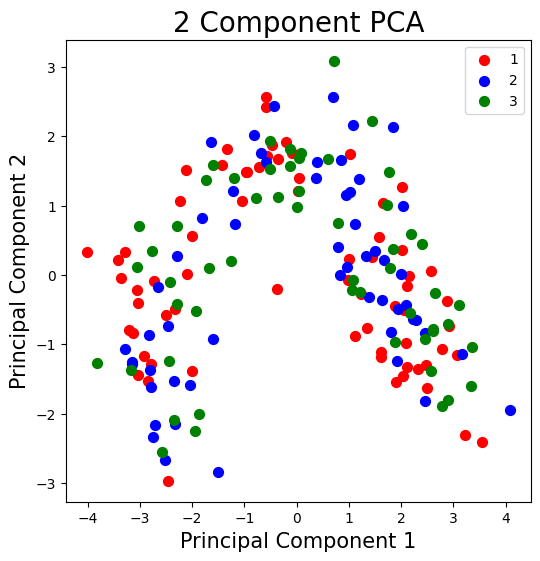

In [15]:
# Menggambarkan proyeksi 2D
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1, 1, 1)

# Memberi label sumbu X sebagai Principal Component 1
ax.set_xlabel('Principal Component 1', fontsize=15)

# Memberi label sumbu Y sebagai Principal Component 2
ax.set_ylabel('Principal Component 2', fontsize=15)

ax.set_title('2 Component PCA', fontsize=20)

# Misalkan 'finalDf' adalah DataFrame hasil PCA
targets = [1, 2, 3]  # Misalkan ini adalah kelas atau target yang Anda miliki
colors = ['r', 'b', 'g']

for target, color in zip(targets, colors):
    indicesToKeep = finalDf['class'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'],
               finalDf.loc[indicesToKeep, 'principal component 2'],
               c=color, s=50)

ax.legend(targets)
plt.show()

**Varians**

PCA tidak sepenuhnya mengandung informasi seperti pada dataset awal. Untuk mengetahui berapa informasi yang kita peroleh dapat menggunakan pca.explained_variance_ratio_. Pada saat mengubah ruang 10 dimensi menjadi ruang 2 dimensi, sebagian varians (informasi) dapat hilang.

Dapat diketahui pada hasil dibawah bahwa feature 1 mengandung 43,74% informasi dan feature 2 mengandung 17,60% informasi sehingga jika di total kurang lebih hasil PCA mengandung 61,34% informasi dan dapat disimpulkan bahwa hasil PCA mengandung beberapa informasi yang kurang valid.

In [16]:
pca.explained_variance_ratio_

array([0.43748934, 0.17601378])